Let's check the gain curves

We need to be able to predict time spent for consuming required resources during specified time interval
with resource rate being depleted.

Gain curves


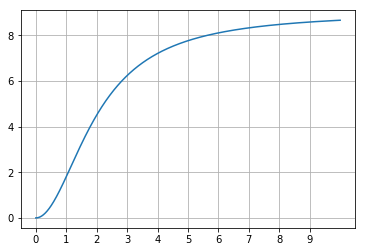

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from sympy import *
import math
x = np.linspace(0, 10, 1000)
#Sigmoidal: Holling Type III curve: y=ax*ax/(b*b + x*x), where a and b are
#constants.
a=3
b=2
y=(a*x)*(a*x)/(b*b + x*x)

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 10, 1))
plt.plot(x, y, linestyle='solid')
plt.grid()

We actually need a curve that has fraction of energy -
E energy required, all rate available, only the part that is used is depleted.

That means the depletion is related to use, not avail
All energies are rates

Ea - Energy available
Ef - full energy
Er - Er - required energy

So after every tick (t)

decrease rate is a constant dr=Er/3

Ea=Ea-dr

x=Ea

At tick t the energy potential is simply: 
Ea(t)=Ef-dr*t







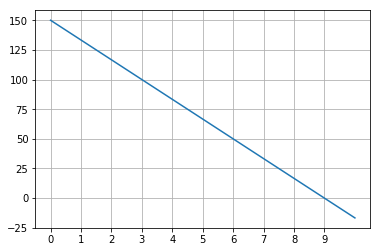

In [171]:
t = np.linspace(0, 10, 1000)

a=3
b=2
Ef=150
Er=50
dr=Er/3
#y =ax2=(b2 + x2)
y=Ef-(dr*t)

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 10, 1))
plt.plot(t, y, linestyle='solid')
plt.grid()

In [86]:
init_printing(use_unicode=False, wrap_line=False)
t = Symbol('t')
integrate(Ef-dr*t)

The function of energy the period

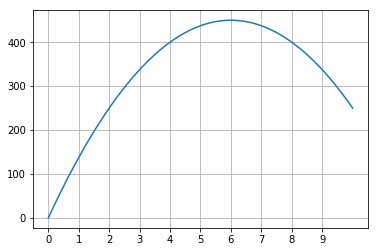

In [89]:
t = np.linspace(0, 10, 1000)
dr=Er/2
y=Ef*t-dr/2*t*t

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 10, 1))
plt.plot(t, y, linestyle='solid')
plt.grid()

Now that was actually energy rate not energy, we are interested in time that takes to get what we need
So... 
At tick t the energy potential is simply: 
Ea(t)=Ef-dr*t

So at this moment getting energy Er takes time (mt)
tm(t)=Er/(Ef-dr*t)
which gives us how many humanworkdays it takes to fullfull requiremets

So we need to integrate to get real time.

tekitab assümptootilise kõvera

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


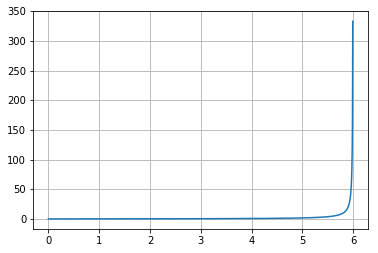

In [170]:
t = np.linspace(0, 6, 1000)
Ef=150
Er=50
#dr=Er/3
dr=Er/2
y=Er/(Ef-(Er*t/2))

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 100, 1))
#ax.set_yticks(np.arange(0, 2, 0.01))
plt.plot(t, y, linestyle='solid')
plt.grid()

In [169]:
init_printing(use_unicode=False, wrap_line=False)
t = Symbol('t')
ser=Symbol('Er')
sef=Symbol('Ef')
sdr=Symbol('dr')
#integrate(ser/(sef-(ser*t/2)),(t,0,5.6))

integrate(50/(150-(50*t/2)),(t,0,5.9999))

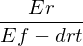

In [106]:
ser/(sef-sdr*t)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


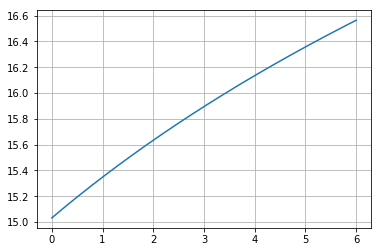

In [160]:
#We want to know how many workdays have been done for providing energy for t days
t = np.linspace(0, 6, 1000)
Ef=150
Er=50
dr=Er/3
#dr=Er/2
y=-(Er*np.log(-Ef+dr*t)/dr)
y=Er*np.log(Ef+dr*t)/dr
fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(np.arange(0, 10, 1))
plt.plot(t, y, linestyle='solid')
plt.grid()

Let's try to create a depletion function

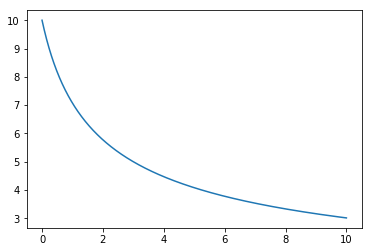

In [51]:
x = np.linspace(0, 10, 1000)
a=10
b=2
#2.7
y=a/((x+1)**(1/2)) #/ (x)
plt.plot(x, y, linestyle='solid')

In [53]:
from sympy import *
init_printing(use_unicode=False, wrap_line=False)
x = Symbol('x')
integrate(a/((x)**(1/2)))

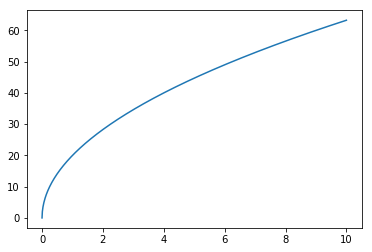

In [54]:
x = np.linspace(0, 10, 1000)
y=2*a*((x)**(1/2)) #/ (x)
plt.plot(x, y, linestyle='solid')

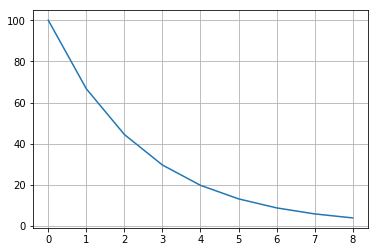

In [194]:
n=1
x=100
y=[]
for n in range(1,10):
    y.append(x)
    x=x-(x/3)

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 100, 1))
plt.plot(y, linestyle='solid')
plt.grid()

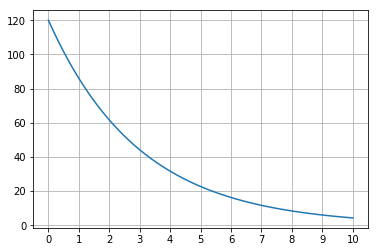

In [311]:
# dr/dt = a*r
# solution is then (http://www.ugrad.math.ubc.ca/coursedoc/math100/notes/diffeqs/cool.html):
# http://www.math.ucsd.edu/~benchow/ODEsolver.pdf
# y = (y0 * e)**(a*x)

y0 = 120
a=1/3
x = np.linspace(0, 10, 1000)
y = y0 * (math.e)**(-a*x)
fig = plt.figure()
ax = fig.gca()

ax.set_xticks(np.arange(0, 100, 1))
plt.plot(x, y, linestyle='solid')
plt.grid()

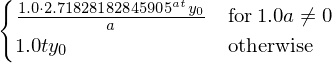

In [214]:
init_printing(use_unicode=False, wrap_line=False)
st = Symbol('t')
sy0 = Symbol('y0')
sa = Symbol('a')
integrate(sy0 * (math.e)**(sa*st),st)

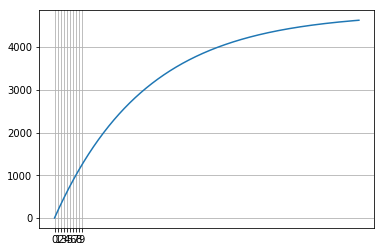

In [310]:
#the rate of the integration must be a lot smaller: a*req energy / full energy
t = np.linspace(0, 100, 1000)

a=1/30
const=1/a
# energy returns in time
y=const*y0+(math.e**(-a*t)*y0)/-a

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 10, 1))
plt.plot(t, y, linestyle='solid')
plt.grid()

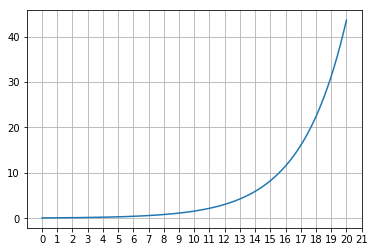

In [327]:
# We need time costs of using a resource in a timespan t while energy rate is declining with abovementioned graph!
# Let's see how much time it takes to harvest energy required for t
# starting energy rate
y0 = 450 
# required energy
# when same as beginning, shoule be ok
req = 25
a=-1/3
t = np.linspace(0, 20, 1000)
# y = y0 * (math.e)**(a*x)
# change of time spent on harvesting a patch while it is depleted
tcost = req / (y0 * (math.e)**(a*t))
#tcost = y0 * (math.e)**(a*t)
fig = plt.figure()
ax = fig.gca()

ax.set_xticks(np.arange(0, 100, 1))
plt.plot(t, tcost, linestyle='solid')
plt.grid()





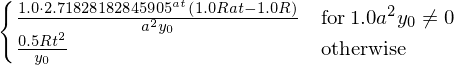

In [301]:
# integrate
init_printing(use_unicode=False, wrap_line=False)
st = Symbol('t')
sy0 = Symbol('y0')
sa = Symbol('a')
sreq = Symbol('R')
integrate(st * sreq / sy0 * (math.e)**(sa*st),st)

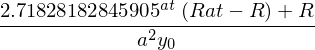

In [296]:
(math.e**(sa*st)*(st*sreq*sa - sreq) + sreq)/(sa*sa*sy0)

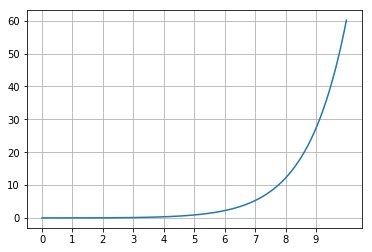

In [328]:
#so the time costs of harvesting while the rate is declining
t = np.linspace(0, 10, 1000)
a=2/3
y0 = 500
req = 3

y=(math.e**(a*t)*(t*req*a - req) + req)/(a*a*y0)
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 10, 1))
plt.plot(t, y, linestyle='solid')
plt.grid()

Let's try everything again, we where still depleting the whole resource pool, not only by patches of requirement,
let's not deplete only by a*req/y0 not by a

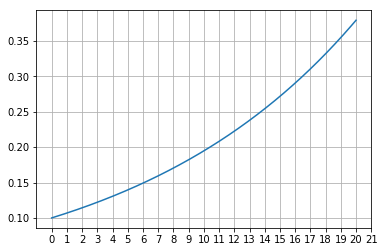

In [370]:
# We need time costs of using a resource in a timespan t while energy rate is declining with abovementioned graph!
# Let's see how much time it takes to harvest energy required for t
# starting energy rate
y0 = 450 
# required energy
# when same as beginning, shoule be ok
req = 45
a=2/3
t = np.linspace(0, 20, 1000)
# y = y0 * (math.e)**(a*x)
# change of time spent on harvesting a patch while it is depleted
tcost = req / (y0 * (math.e)**((-a*req/y0)*t))
#tcost = y0 * (math.e)**(a*t)
fig = plt.figure()
ax = fig.gca()

ax.set_xticks(np.arange(0, 100, 1))
plt.plot(t, tcost, linestyle='solid')
plt.grid()

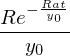

In [338]:
# Can we simplify the formula?

init_printing(use_unicode=False, wrap_line=False)
st = Symbol('t')
sy0 = Symbol('y0')
sa = Symbol('a')
sreq = Symbol('R')
se = Symbol('e')
factor(sreq / sy0 * (se)**((-sa*sreq/sy0)*st))
#nope, not really

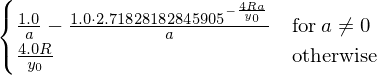

In [365]:
# let's integrate
init_printing(use_unicode=False, wrap_line=False)
st = Symbol('t')
sy0 = Symbol('y0')
sa = Symbol('a')
sreq = Symbol('R')
#se = Symbol('e')
integrate(sreq/ sy0 * (math.e)**((-sa*sreq/sy0)*st),(st,0,4))

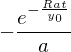

In [343]:
-(se**(-sreq*sa*st/sy0))/sa

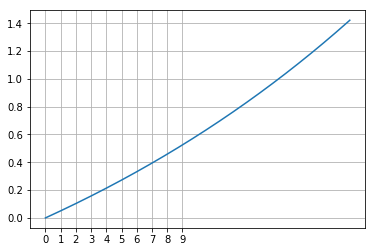

In [385]:
#so the time costs of harvesting while the rate is declining
t = np.linspace(0, 20, 1000)
a=2/3
y0 = 500
req = 25

y=(math.e**(req*a*t/y0)-1)/a
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 10, 1))
plt.plot(t, y, linestyle='solid')
plt.grid()

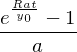

In [389]:
#can we simplify the formula?
init_printing(use_unicode=False, wrap_line=False)
st = Symbol('t')
sy0 = Symbol('y0')
sa = Symbol('a')
sreq = Symbol('R')
se = Symbol('e')
simplify((se**(sreq*sa*st/sy0)-1)/sa)
#nope no simplify
# BUT HOPEFULLY THIS IS CORRECT 

From here let's create some formulas for working to put in article

In [394]:
R = Symbol('R')
r= Symbol('r')
t=Symbol('t')

Re*(8-2*t)-(300*t+390*t)

TypeError: 'Add' object is not iterable